In [64]:
# setup neural playground
import carabao
import carabao.screen
import carabao.cell

import importlib
importlib.reload(carabao)         # reload module
importlib.reload(carabao.screen)  # reload module
importlib.reload(carabao.cell)    # reload module

<module 'carabao.cell' from '/Users/hux/Bluenetics/Git/Neural/carabao-utils/venv/lib/python3.11/site-packages/carabao/cell.py'>

--------------------------------------------------------------
iteration:  0 cell: #0 (phase 1)
   k: 0 , g: [0, 1, 2] , eta: 0.5
   K: [    3    4    5    6    7;     1    3    5    7    9]
   P: [  0.5  0.6  0.1  0.2  0.3;     0  0.6  0.4    0    0]
   u: 1
   x: 0
   y: 0
   c: [0, 0, 0, 0, 1, 1, 0, 0, 1, 1]
-------------------------------------------------------------
--------------------------------------------------------------
iteration:  0 cell: #1 (phase 1)
   k: 1 , g: [0, 1, 2] , eta: 0.5
   K: [    4    5    6    7    8;     2    4    5    6    7]
   P: [  0.1  0.3  0.5  0.1    0;     0  0.6  0.5  0.7    0]
   u: 1
   x: 0
   y: 0
   c: [0, 0, 0, 0, 1, 1, 0, 0, 1, 1]
-------------------------------------------------------------
--------------------------------------------------------------
iteration:  0 cell: #2 (phase 1)
   k: 2 , g: [0, 1, 2] , eta: 0.5
   K: [    5    6    7    8    9;     0    3    7    8    9]
   P: [    0  0.1  0.5  0.7  0.1;     0  0.1  0.3  0.8    0

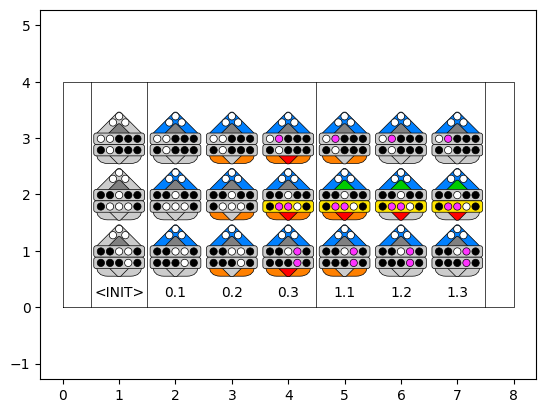

In [65]:
# minicolumn: explore a 3 x 1 minicolumn

from carabao.screen import Monitor
from carabao.cell import Cell,toy
from numpy import ones

def lookup(key):
    dict = {'VEWU':'0.1', 'WEJE':'0.2', 'MYRY':'0.3', 'XASU':'1.1',
            'GOSI':'1.2', 'EETI':'1.3'}
    return dict[key] if key in dict else key

class Mini:
    fac = 1.0
    def __init__(self,mon,k,g,K,P):
        self.mon = mon
        
        self.cells = []
        for i in range(0,3):
            cell = Cell(mon,k[i],g,K[i],P[i])
            self.cells.append(cell)

    def plot(self,j):
        for i in range(0,3):
            self.cells[i].plot(i*self.fac,j)    # plot at monitor location i,j
        self.mon.text(1,0.25,'<INIT>')
        return j+1

    def phase(self,ph,u,c,j):
        """
        c,col = mini.phase(1,u,c,j)
        c,col = mini.phase(2,u,c,j)
        c,col = mini.phase(3,u,c,j)
        """
        n = 0
        for i in range(0,len(self.cells)):
            cell = self.cells[i]
            c = cell.phase(ph,u,c)
            cell.plot(i*self.fac,j);
            n += cell.mon.hash(cell)
        cell.mon.text(j+1,0.25,lookup(mon.ascii(n)))
        halfline = "==============================="
        print("%s%s" % (halfline,halfline))
        return c,j+1

    def iter(self,u,c,col):
        c,col = self.phase(1,u,c,col);  
        c,col = self.phase(2,u,c,col);  
        c,col = self.phase(3,u,c,col);
        self.mon.separator(col)
        return c,col

#====================================================================================
# run mini3 toy network with 2 iterations
#====================================================================================

k,g,K,P,c = toy('mini3')
mon = Monitor(m=3,n=7)
mini = Mini(mon,k,g,K,P)

u = 1; 
mon.separator(0)
col = mini.plot(0)
mon.separator(1)

c,col = mini.iter(u,c,col);   # iteration 0
c,col = mini.iter(u,c,col);   # iteration 1
